# エラーバー付きグラフの書き方

エラーバー付きのグラフを作成する際にはTGraphErrorsをつかう。  
TGraphErrorsの引数はデータの数、x配列, y配列, x error配列, y error配列。  
詳しくは[ROOTのホームページ参照](https://root.cern.ch/doc/master/classTGraphErrors.html)


必要な配列を準備

In [1]:
const int num = 10; // 配列の要素数を１０に設定constはこの変数は固定であることを示す。
double q[num]; // thetaを入れるための配列
double sq[num]; // sin(theta)を入れるための配列
double eq[num]; // thetaのerrorを入れるための配列
double esq[num]; // sin(theta)のerrorを入れるための配列

for文を使って各要素にsin関数のデータとエラーを代入していく。  
ここで`static_cast`はデータ型の変換を意味する。つまり整数型のiを浮動小数点型に変換している。  
`TMath::Sin()`,`TMath::Pi()`は名前空間`TMath`で定義されている`Sin()`,`Pi()`という関数を意味している。  

In [3]:
for(int i = 0; i < num;++i)
{
    q[i] = (static_cast<double>(i)/num)*2*TMath::Pi();
    sq[i] = TMath::Sin(q[i]);
    eq[i] = 0.2; // x軸のエラーは0.2に設定
    esq[i] = fabs(gRandom->Gaus(0,3)); // y軸のエラーはガウス分布にする
}

キャンバスの作成

In [8]:
auto c = new TCanvas();

エラー付きグラフの作成

In [6]:
auto gre = new TGraphErrors(num,q,sq,eq,esq);

作成したグラフを表示。  
ここでオプション`A`はフレームを描く、`P`はマーカーを描く。

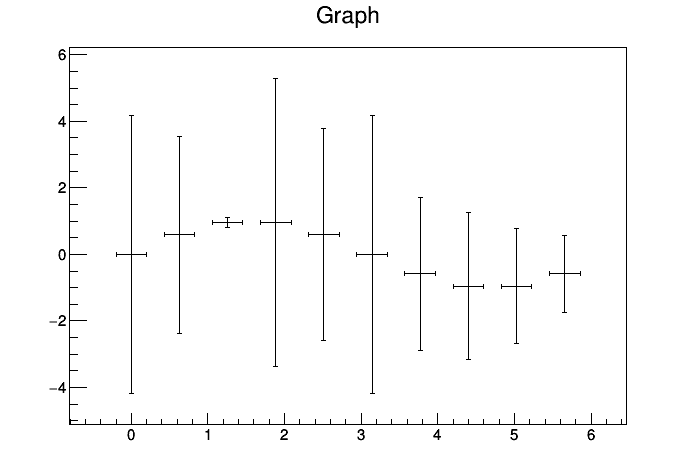

In [9]:
gre->Draw("AP");
c->Draw();